# MACE 2024 - SVM

## Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

# Linear SVM

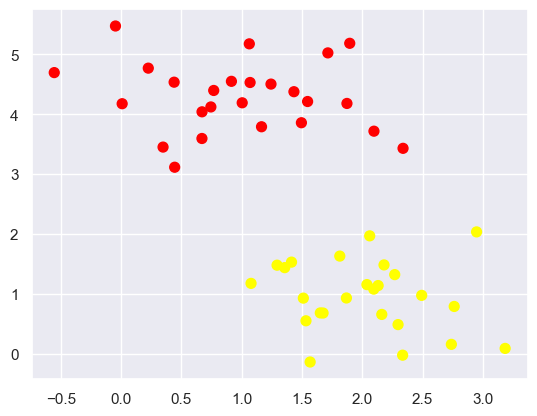

In [31]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")

### Function SVC - Linear

In [32]:
from sklearn.svm import SVC
model=SVC(kernel="linear", C = 10**10)
model.fit(X,Y)

SVC(C=10000000000, kernel='linear')

(-0.41872382476349596, 5.754870487889891)

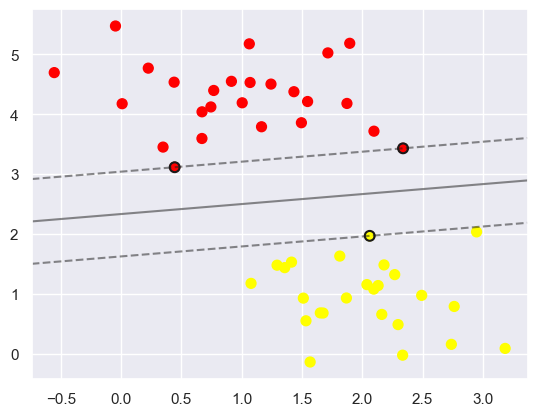

In [33]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

##Generamos la parrila de puntos para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(yy,xx)

xy = np.vstack([X.ravel(), Y.ravel()]).T
P = model.decision_function(xy).reshape(X.shape)


##Representamos las fronteras y los márgenes del SVM
ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

#Resaltamos los SV
SV = model.support_vectors_

ax.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

## Non Linear SVM

In [34]:
from sklearn.datasets import make_circles

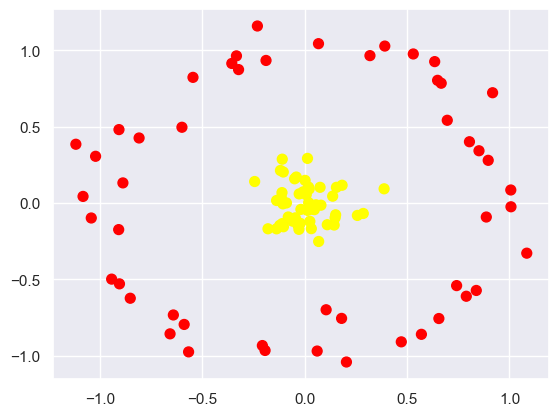

In [35]:
X, Y = make_circles(100, factor = .1, noise = .1) 
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

In [36]:
rbf = SVC(kernel="rbf", C=10**6)
rbf.fit(X,Y)

SVC(C=1000000)

(-1.149862890639663, 1.2684936079547287)

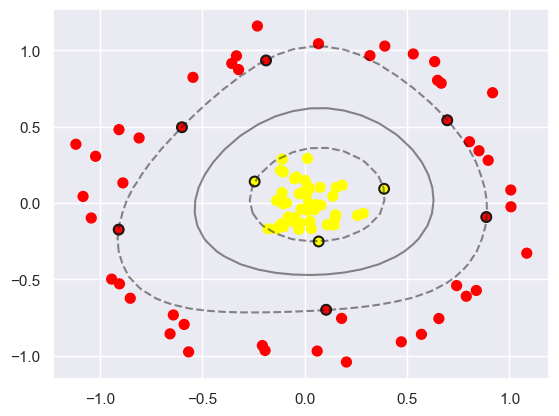

In [37]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

##Generamos la parrila de puntos para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(yy,xx)

xy = np.vstack([X.ravel(), Y.ravel()]).T
P = rbf.decision_function(xy).reshape(X.shape)


##Representamos las fronteras y los márgenes del SVC
ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

SV = rbf.support_vectors_
ax.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

## Tuning SVM

(-2.1911770189542707, 7.065474697949433)

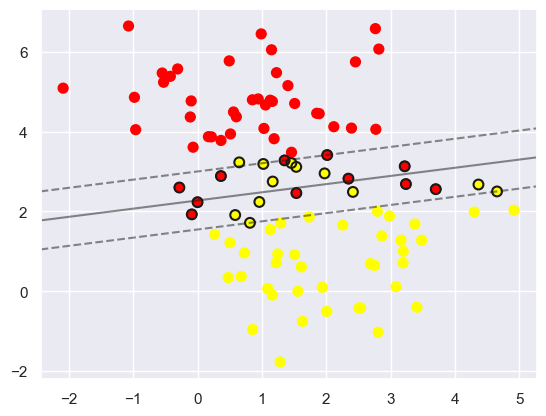

In [38]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

##Generamos la parrila de puntos para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(yy,xx)

xy = np.vstack([X.ravel(), Y.ravel()]).T
P = model.decision_function(xy).reshape(X.shape)


##Representamos las fronteras y los márgenes del SVC
ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

SV = model.support_vectors_
ax.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


ax.set_xlim(xlim)
ax.set_ylim(ylim)

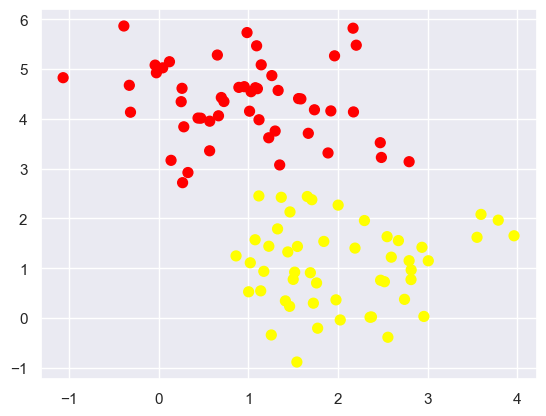

In [39]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

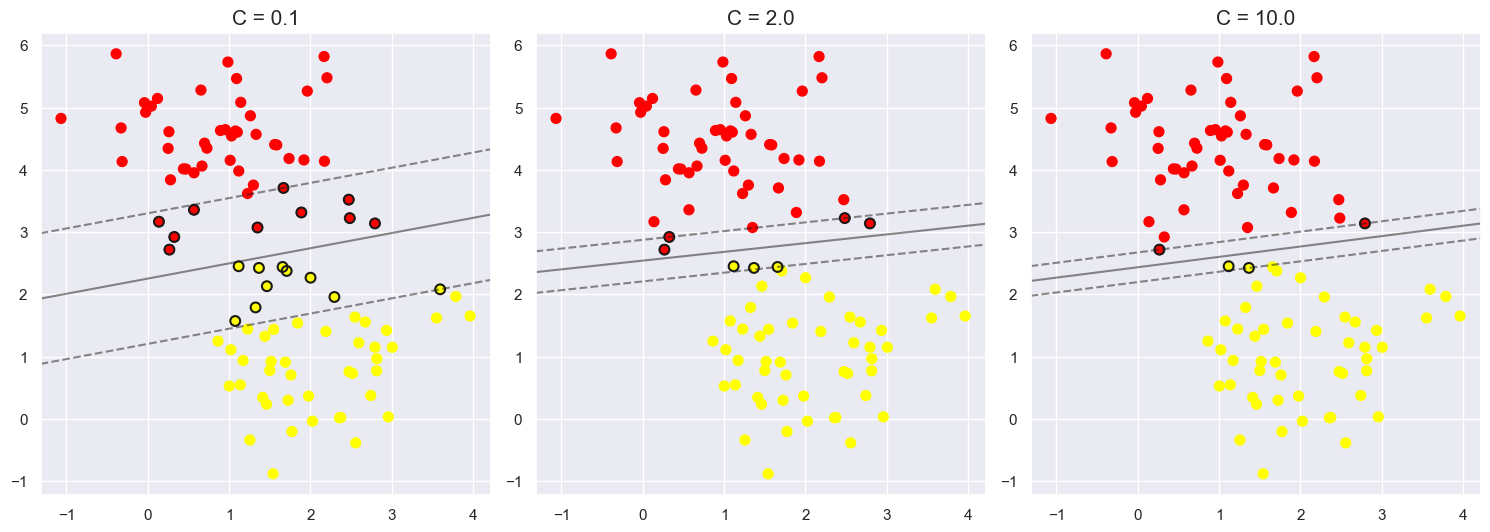

In [40]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [0.1, 2, 10]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    
    xlim = ax_i.get_xlim()
    ylim = ax_i.get_ylim()

    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y0, X0 = np.meshgrid(yy,xx)

    xy = np.vstack([X0.ravel(), Y0.ravel()]).T
    P = model.decision_function(xy).reshape(X0.shape)


    ##Representamos las fronteras y los márgenes del SVC
    ax_i.contour(X0,Y0,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

    SV = model.support_vectors_
    ax_i.scatter(SV[:,0], SV[:,1], s=50, linewidth=1.5, facecolors = 'none', edgecolor='k')


    ax_i.set_xlim(xlim)
    ax_i.set_ylim(ylim)
    ax_i.set_title("C = %.1f"%C, size = 15)


    

### Accuracy

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [43]:
model = SVC(kernel='linear', C=10).fit(X_train, Y_train)
model.score(X_test,Y_test)

0.975

## Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(model, X, Y, cv=5)
scores, scores.mean(), scores.std()

(array([0.95, 1.  , 0.95, 1.  , 1.  ]),
 0.9800000000000001,
 0.024494897427831803)

In [45]:
model = SVC(kernel='linear', C=1)
model.fit(X_train, Y_train)


SVC(C=1, kernel='linear')

In [46]:
from sklearn.metrics import confusion_matrix
Ypred = model.predict(X_test)
confusion_matrix(Ypred, Y_test)

array([[19,  0],
       [ 0, 21]])

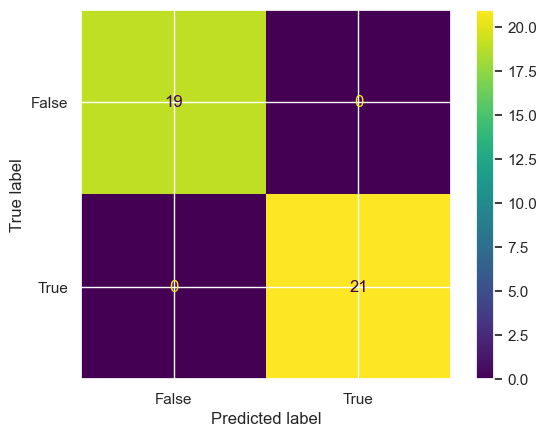

In [47]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, Ypred), display_labels = [False, True])

cm_display.plot()
plt.show()



In [48]:
CM = confusion_matrix(Y_test, Ypred)

TP= CM[0,0]
FP= CM[1,0]
FN = CM[0,1]
TN= CM[1,1]

print("Sensitivity: ", TP/(TP+FP))
print("Specificity: ", TN/(TN+FN))

Sensitivity:  1.0
Specificity:  1.0


## Multiclass Datasets

In [49]:
from sklearn import svm, datasets
iris = datasets.load_iris()

X = iris.data[:, :2]
Y = iris.target

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [50]:
C = 1.0
model = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = model.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVM Iris')

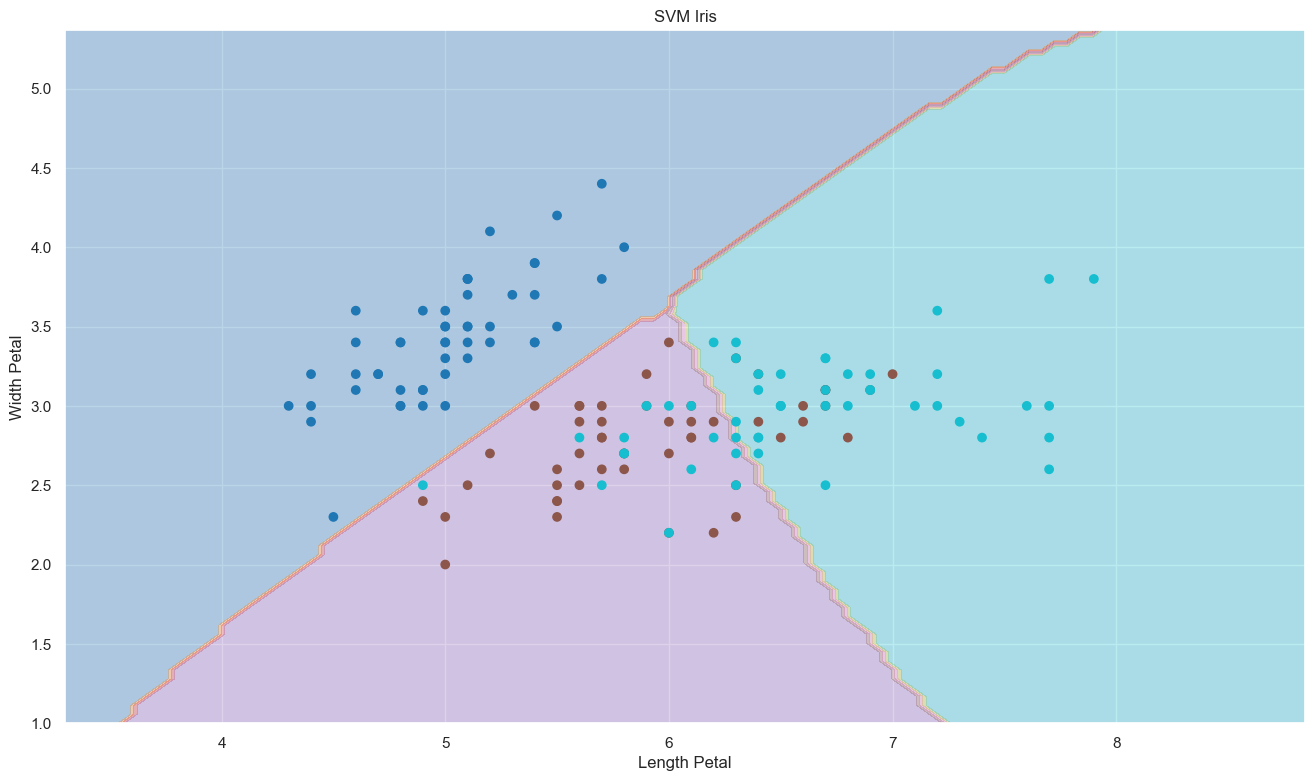

In [51]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Length Petal")
plt.ylabel("Width Petal")
plt.xlim(xx.min(), xx.max())
plt.title("SVM Iris")

In [52]:
### Tuning Iris SVM

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [54]:
X, Y = shuffle(X,Y, random_state = 0)
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

model = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
model.fit(X,Y)
model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

### Face Recognition

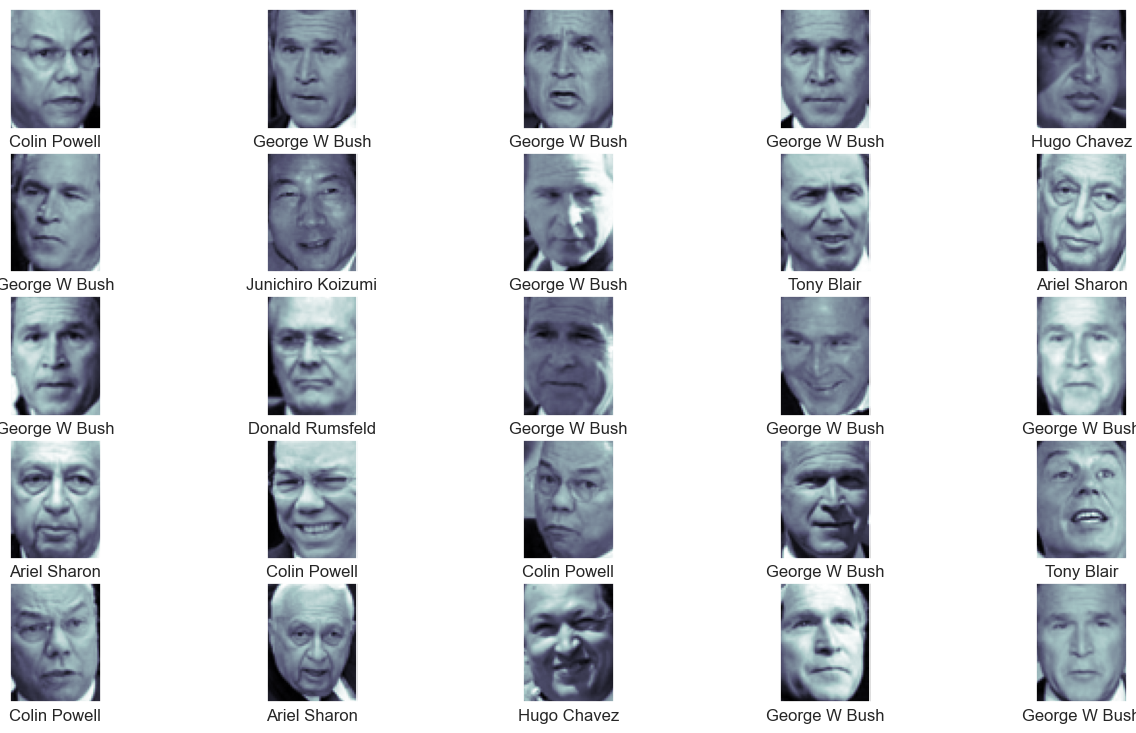

In [55]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [56]:


Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

param_grid = {
    'kernel': ['rbf'],
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
model = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
model.fit(Xtrain, Ytrain)
model.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Text(0.5, 0.98, 'Wrong Predictions in red')

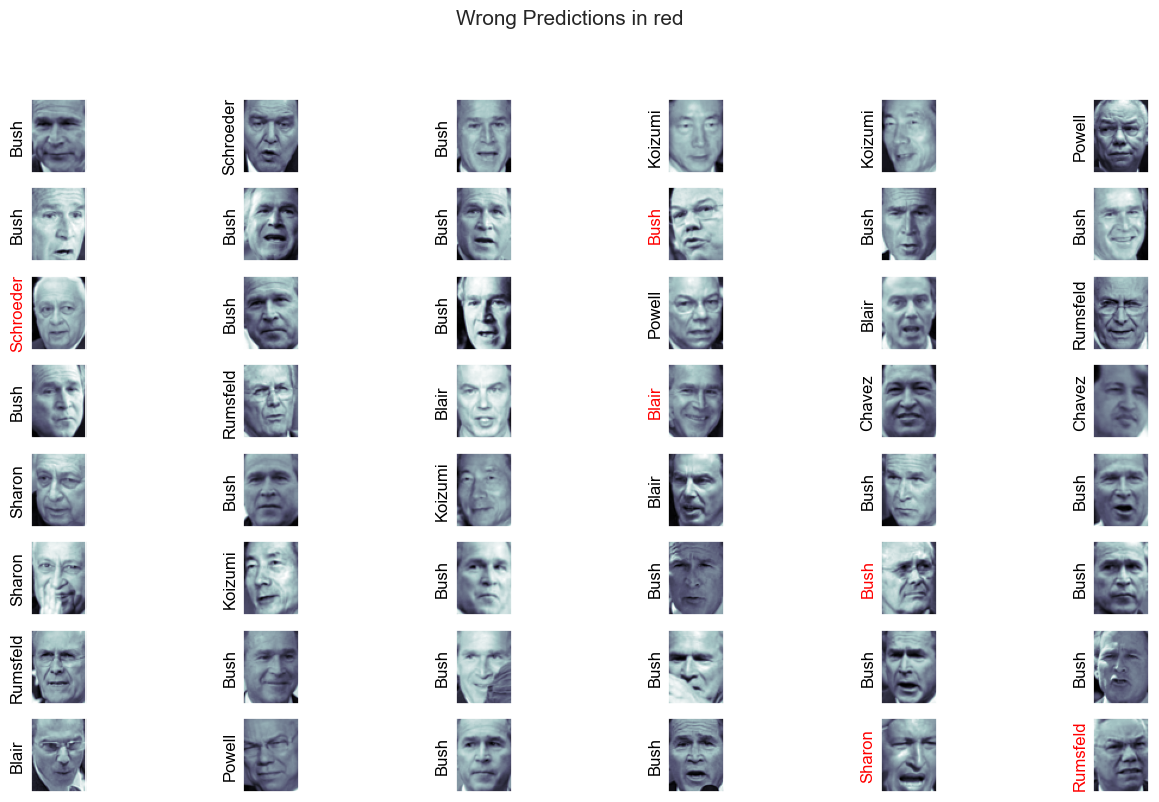

In [57]:
classifier = model.best_estimator_
yfit = classifier.predict(Xtest)
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Wrong Predictions in red", size = 15)

<Axes: >

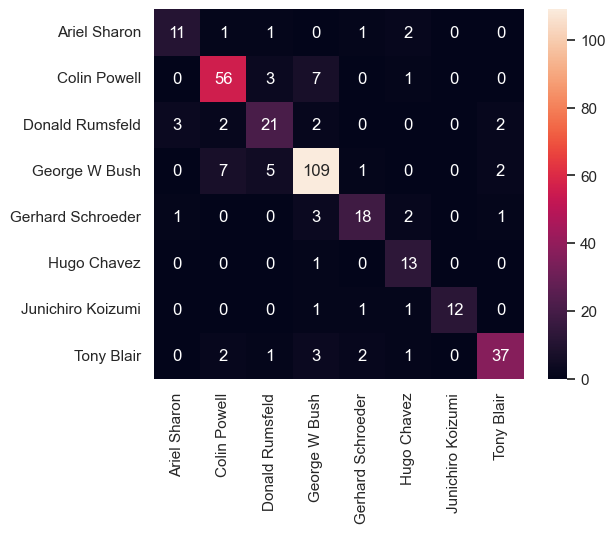

In [58]:
CM = confusion_matrix(Ytest, yfit)
sns.heatmap(CM.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )